In [1]:
from collections import Counter
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def count_words(text):
    text=text.lower()
    skips=[".",',',',',';',':',"'",'"']
    for ch in skips:
        text=text.replace(ch,'')
    word_counts={}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word]+=1
        else:
            word_counts[word]=1
    return word_counts
            

In [4]:
word_counts=Counter(text.split(' '))

NameError: name 'text' is not defined

In [5]:
def read_book(title_path):
    with open (title_path,'r',encoding='utf8') as current_file:
        text=current_file.read()
        text=text.replace('\n','').replace('\r','')
    return text

In [6]:
text=read_book("Romeo and Juliet.txt")

In [7]:
len(text)

169275

In [8]:
ind=text.find("What's in a name?")

In [9]:
sample_text=text[ind:ind+1000]

In [10]:
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [11]:
def word_stats(word_counts):
    num_unique=len(word_counts)
    counts=word_counts.values()
    return (num_unique,counts)

In [12]:
word_counts=count_words(text)

In [13]:
(num_unique,counts)=word_stats(word_counts)

In [35]:
num_unique

9700

In [15]:
sum(counts)

40776

In [16]:
print(num_unique,sum(counts))

5118 40776


In [19]:
textG=read_book("Romeo und Julia.txt")

In [20]:
word_counts=count_words(textG)
(num_unique,counts)=word_stats(word_counts)
num_unique
sum(counts)
print(num_unique,sum(counts))

7527 20311


In [21]:
stats=pd.DataFrame(columns=('Language','Author','Title','Length','Unique'))
title_num=1

In [22]:
book_dir="./Books"

In [23]:
os.listdir(book_dir)

['English', 'French', 'German', 'Portuguese']

In [25]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" +language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile=book_dir+"/" +language+ "/" +author+ "/" +title
            text=read_book(inputfile)
            (num_unique,counts)=word_stats(count_words(text))
            stats.loc[title_num]=language,author.capitalize(),title,sum(counts),num_unique
            title_num+=1

In [26]:
stats.head(5)

,Language,Author,Title,Length,Unique
1,English,Shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,Shakespeare,Hamlet.txt,28551,6776
3,English,Shakespeare,Macbeth.txt,16874,4780
4,English,Shakespeare,Othello.txt,26590,5898
5,English,Shakespeare,Richard III.txt,48315,5449


In [27]:
stats.tail(5)

,Language,Author,Title,Length,Unique
200,Portuguese,Queir┬ós,O crime do padre Amaro.txt,128630,29300
201,Portuguese,Queir┬ós,O Mandarim.txt,21440,7836
202,Portuguese,Queir┬ós,O Primo Bazilio.txt,107303,27644
203,Portuguese,Queir┬ós,Os Maias.txt,195771,40665
204,Portuguese,Shakespeare,Hamlet.txt,30567,9700


In [28]:
stats.head()

,Language,Author,Title,Length,Unique
1,English,Shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,Shakespeare,Hamlet.txt,28551,6776
3,English,Shakespeare,Macbeth.txt,16874,4780
4,English,Shakespeare,Othello.txt,26590,5898
5,English,Shakespeare,Richard III.txt,48315,5449


In [29]:
stats['Title']=stats["Title"].apply(lambda x:str(x).split('.txt')[0])


In [30]:
stats.head(20)

,Language,Author,Title,Length,Unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978
8,French,Chevalier,L'a╠èle de sable,73801,18989
9,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10831
10,French,Chevalier,La capitaine,46306,13083


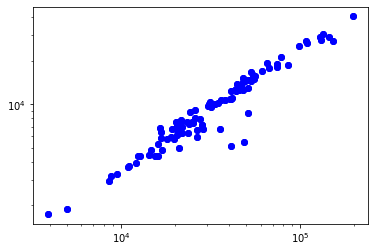

In [31]:
plt.loglog(stats['Length'],stats['Unique'],'bo')

In [32]:
stats[stats['Language']=='English'].head()

,Language,Author,Title,Length,Unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


Text(0, 0.5, 'Number of Unique Words')

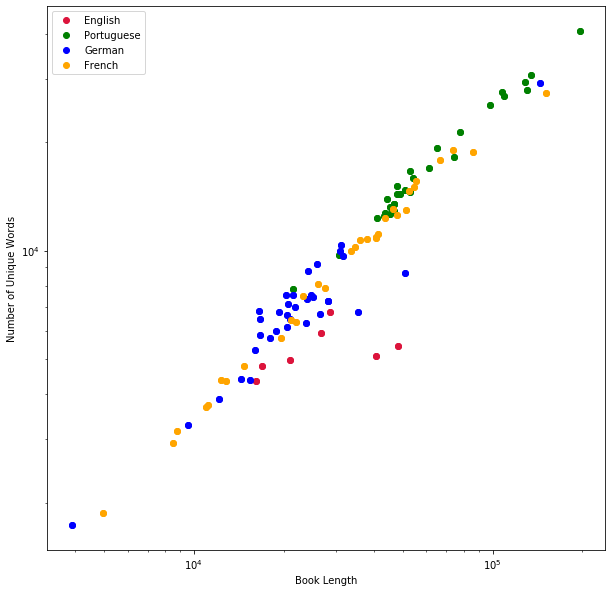

In [33]:
plt.figure(figsize=(10,10))
a=stats[stats['Language']=='English']
plt.loglog(a.Length,a.Unique,'o',label='English',color='crimson')
a=stats[stats['Language']=='Portuguese']
plt.loglog(a.Length,a.Unique,'o',label='Portuguese',color='green')
a=stats[stats['Language']=='German']
plt.loglog(a.Length,a.Unique,'o',label='German',color='blue')
a=stats[stats['Language']=='French']
plt.loglog(a.Length,a.Unique,'o',label='French',color='orange')
plt.legend()
plt.xlabel('Book Length')
plt.ylabel('Number of Unique Words')